### Import packages

In [192]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import operator
from sklearn.preprocessing import MinMaxScaler, LabelBinarizer
from sklearn.feature_selection import SelectKBest, chi2, mutual_info_classif
%matplotlib inline

### Read the data

In [193]:
bank = pd.read_csv('bank-additional-full.csv', sep=';')
bank.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


### Data Analysis

#### __Task 1__: 
Plot the distribution of values in the class attribute of the dataset using a
bar chart. Please describe what you observe, e.g. whether the data distribution is
imbalanced.

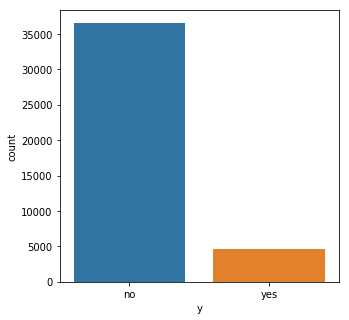

In [194]:
plt.figure(figsize=(5,5))
sns.countplot("y",data=bank)
plt.show()

As we observe the class distribution from the bar chart above, we can see that the distribution is extremely imbalanced, with `no`(clients who would not consider subscribing the product) taking up the majority, approximately 30000 clients more than `yes`(clients who are subscribers).

#### __Task 2__: 

Read the reference and answer the following questions.

- a) Please summarize the characteristics and differences of chi-square
function (https://en.wikipedia.org/wiki/Chi-squared_test) and mutual
information functions (https://en.wikipedia.org/wiki/Mutual_information)
- b) Can we simply apply chi-square function and mutual information function
on Bank Marketing Dataset for feature selection? Please explain. (hint: the
difference between categorical and numerical data)
- c) Employ chi-square or mutual information as appropriate to obtain a
measure between values of each feature and the class. Rank features by
their measures of chi-square and mutual information.
Note: Please make two lists: one for chi-square and the other for mutual
information. An attribute only belongs to one list.


a) Both chi-square function and mutual information functions are feature selection techniques that are used to rank features and measure how important each feature is when doing the classification task:

- chi-square:
    - The chi-square test is a statistical test of independence to determine the dependency of two variables. 
    - $$\chi^2=\sum_{i=1}^{n} \frac{(O_i - E_i)^2}{E_i}$$
        - If the chi-square test score is smaller, then the two features are more likely to be independent, thus it's safe to discard that feature variable without affecting the outcome.
        - If the chi-square test score is high, then the two variables are more likely correlated to each other, which indicates that the feature variable is very important.
    - By calculating the Chi square scores for all the features, we can rank the features by the chi square scores, then choose the top ranked features for model training. 
    - chi square test is more appropriate for categorical variables
    
- mutual information function
    - The goal of MI is to measure mutual dependence between variables, and how strong the relation is between these variables. It is closely associated with the idea of entropy, applied to quantify the amount of information obtained.
    - $${\displaystyle I(X;Y)=\int _{Y}\int _{X}p(x,y)\log {\left({\frac {p(x,y)}{p(x)\,p(y)}}\right)}\;dx\,dy}$$
    - thus if X and Y are independent, then their mutual information is zero because 
    $$p(x,y) = p(x)p(y)$$
    $$\log {\left({\frac {p(x,y)}{p(x)\,p(y)}}\right)} = \log 1 = 0$$
    - closely associated with the idea of entropy:

$${\displaystyle {\begin{aligned}I(X;Y)&{}=\sum _{x,y}p(x,y)\log {\frac {p(x,y)}{p(x)p(y)}}\\&{}=\sum _{x,y}p(x,y)\log {\frac {p(x,y)}{p(x)}}-\sum _{x,y}p(x,y)\log p(y)\\&{}=\sum _{x,y}p(x)p(y|x)\log p(y|x)-\sum _{x,y}\log p(y)p(x,y)\\&{}=\sum _{x}p(x)\left(\sum _{y}p(y|x)\log p(y|x)\right)-\sum _{y}\log p(y)\left(\sum _{x}p(x,y)\right)\\&{}=-\sum _{x}p(x)\mathrm {H} (Y|X=x)-\sum _{y}p(y)\log p(y)\\&{}=-\mathrm {H} (Y|X)+\mathrm {H} (Y)\\&{}=\mathrm {H} (Y)-\mathrm {H} (Y|X)\\&{}=\mathrm {H} (X)+ \mathrm{H}(Y) - \mathrm {H} (X, Y)
.\\\end{aligned}}}$$
- intuition of the equation: `the amount of uncertainty in Y which is removed by knowing X`
- Unlike chi square test, mutual info function could be applied to both categorical and numerical variables

- b) No.

Test and explain as follows:

In [195]:
def feature_select(X, y, top_k, score_func):
    selector = SelectKBest(score_func=score_func, k=top_k)
    try:
        X_selected = selector.fit(X, y)
        mask = X_selected.get_support()
        scores = X_selected.scores_
        res = dict(zip(X.columns[mask], scores[mask]))
        return sorted(res.items(), key=operator.itemgetter(1), 
                      reverse=True)
    except Exception as e:
        print(e)

In [196]:
categorical_cols = bank.columns[bank.dtypes==object]
numerical_cols = bank.columns[bank.dtypes!=object]

In [197]:
X = bank.iloc[:,:20]
y = bank.iloc[:,20]

In [198]:
feature_select(X=X, y=y, top_k=len(X.columns), score_func=chi2)

could not convert string to float: 'failure'


In [199]:
feature_select(X=X, y=y, top_k=len(X.columns), 
               score_func=mutual_info_classif)

could not convert string to float: 'failure'


##### Thus we should encode the categorical variables first:

In [200]:
def convert(df, x):
    df[x] = df[x].astype('category').cat.codes
    return df
    
for col in bank.columns[bank.dtypes==object]:
    convert(bank, col)

In [201]:
bank.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,3,1,0,0,0,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
1,57,7,1,3,1,0,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
2,37,7,1,3,0,2,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
3,40,0,1,1,0,0,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
4,56,7,1,3,0,0,2,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0


In [202]:
X = bank.iloc[:,:20]
y = bank.iloc[:,20]

In [204]:
feature_select(X=X, y=y, top_k=len(X.columns), 
               score_func=chi2)

Input X must be non-negative.


In [205]:
feature_select(X=X, y=y, top_k=len(X.columns), 
               score_func=mutual_info_classif)

[('euribor3m', 0.07439068758302914),
 ('duration', 0.07437799596280947),
 ('cons.conf.idx', 0.06979660508167274),
 ('cons.price.idx', 0.06697064001857878),
 ('nr.employed', 0.06499957708094883),
 ('emp.var.rate', 0.05896975926692627),
 ('pdays', 0.0380599927794556),
 ('poutcome', 0.03797698893710222),
 ('month', 0.027695751422377457),
 ('previous', 0.019274375880108385),
 ('age', 0.014167084194000257),
 ('contact', 0.010783284360574852),
 ('job', 0.010301468574388073),
 ('default', 0.008358099772084016),
 ('campaign', 0.007501069394729942),
 ('marital', 0.0060053707081275665),
 ('housing', 0.004001247180142498),
 ('education', 0.0034967153592813105),
 ('day_of_week', 0.0009046329666289044),
 ('loan', 0.0)]

##### Note: after categorical encoding:
- mutual info function is applicable for both categorical and numerical variables;
- for $\chi ^2$, we should split the dataset to categorical variables and numerical variables and apply $\chi ^2$ on only categorical ones;


- c):

In [206]:
X_categorical = bank[categorical_cols].iloc[:, :-1]
X_numerical = bank[numerical_cols]

In [207]:
categorical_list = feature_select(X=X_categorical, y=y, 
                                  top_k=len(X_categorical.columns), 
                                  score_func=chi2)
categorical_list

[('contact', 547.9583093880087),
 ('default', 321.9229031035162),
 ('education', 167.60728300206605),
 ('poutcome', 98.23117431597791),
 ('job', 90.17553267281917),
 ('marital', 27.79559829132918),
 ('day_of_week', 10.231444571849314),
 ('housing', 4.978734333542827),
 ('month', 1.9272840371275475),
 ('loan', 1.587004275347953)]

In [208]:
numerical_list = feature_select(X=X_numerical, y=y, 
                                top_k=len(X_numerical.columns), 
                                score_func=mutual_info_classif)
numerical_list

[('duration', 0.07618431443827434),
 ('euribor3m', 0.07341151936109758),
 ('cons.price.idx', 0.07005806617854993),
 ('cons.conf.idx', 0.06757698968767634),
 ('nr.employed', 0.06577525835710651),
 ('emp.var.rate', 0.05775910205365631),
 ('pdays', 0.03918427546576586),
 ('previous', 0.02085565665967737),
 ('age', 0.01499242568061332),
 ('campaign', 0.006293450430396863)]

#### __Task 3__: 
Based on the two ranked lists obtained in Task 2, plot the value
distribution of (i) the highest ranked three categorical features, (ii) the lowest
ranked three categorical features, (iii) the highest ranked three numerical features,
and (iv) the lowest ranked three numerical features. Describe what you observe
from these value distributions.

In [154]:
bank = pd.read_csv('bank-additional-full.csv', sep=';')

In [155]:
def plots(var_list, type_='categorical'):
    if type_=='categorical':
        for var in var_list:
            ct = pd.crosstab(bank[var], bank.y)
            print(ct)
            ax = ct.plot.bar(stacked=True)
            ax.set_title(var)
            plt.show()
    elif type_=='numerical':
        for var in var_list:
            x_multi = [bank[var][bank.y==i].values for i in set(bank.y)]
            plt.hist(x_multi, bins=10, histtype='bar')
            plt.title(var)
            plt.legend(x_multi, labels = np.unique(bank.y))
            plt.show()

##### i) Highest 3 categorical:

y             no   yes
contact               
cellular   22291  3853
telephone  14257   787


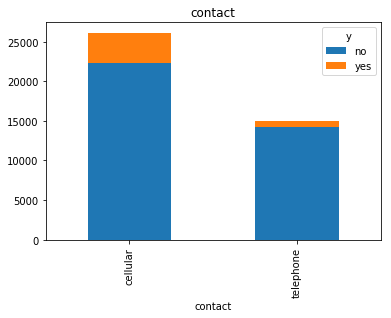

y           no   yes
default             
no       28391  4197
unknown   8154   443
yes          3     0


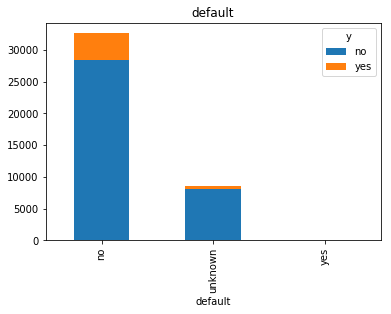

y                       no   yes
education                       
basic.4y              3748   428
basic.6y              2104   188
basic.9y              5572   473
high.school           8484  1031
illiterate              14     4
professional.course   4648   595
university.degree    10498  1670
unknown               1480   251


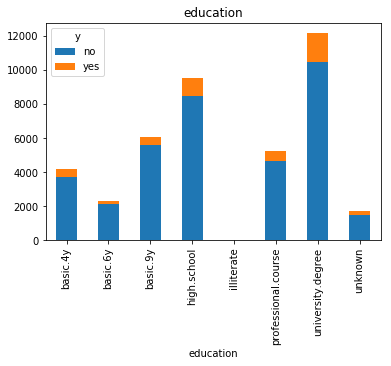

In [156]:
plots(list(map(lambda x: x[0], categorical_list[:3])))

##### ii) Lowest 3 categorical:

y           no   yes
housing             
no       16596  2026
unknown    883   107
yes      19069  2507


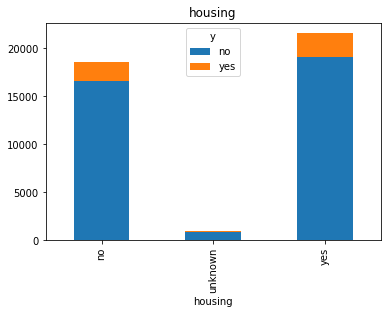

y         no  yes
month            
apr     2093  539
aug     5523  655
dec       93   89
jul     6525  649
jun     4759  559
mar      270  276
may    12883  886
nov     3685  416
oct      403  315
sep      314  256


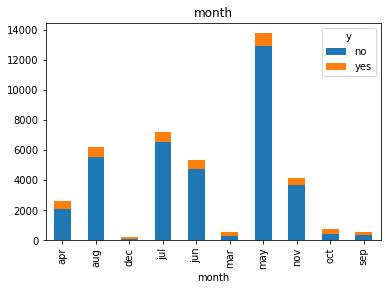

y           no   yes
loan                
no       30100  3850
unknown    883   107
yes       5565   683


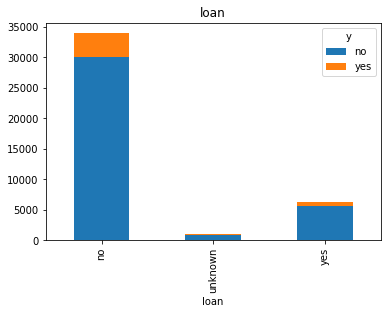

In [157]:
plots(list(map(lambda x: x[0], categorical_list[-3:])))

##### iii) Highest 3 numerical:

/usr/local/lib/python3.6/dist-packages/matplotlib/legend.py:1363: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  warnings.warn("You have mixed positional and keyword "


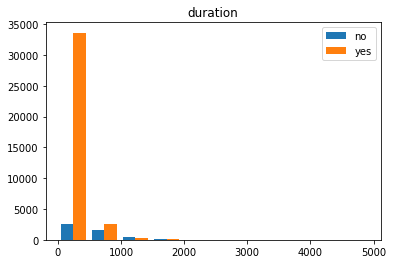

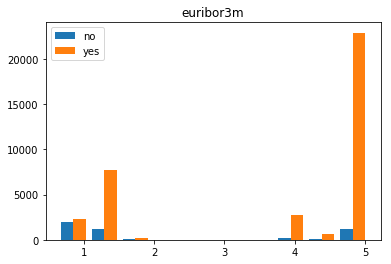

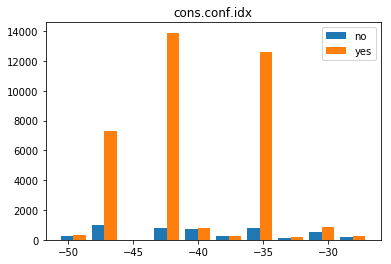

In [158]:
plots(list(map(lambda x: x[0], numerical_list[:3])), type_='numerical')

##### iv) Lowest 3 numerical:

/usr/local/lib/python3.6/dist-packages/matplotlib/legend.py:1363: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  warnings.warn("You have mixed positional and keyword "


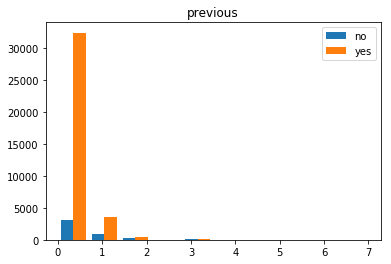

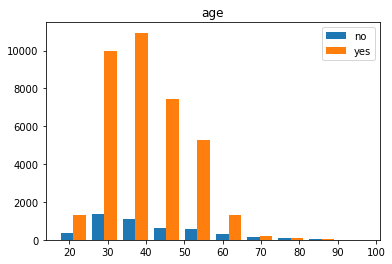

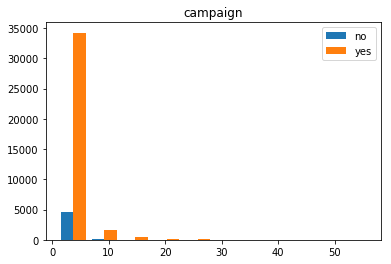

In [159]:
plots(list(map(lambda x: x[0], numerical_list[-3:])), type_='numerical')

### Data preprocessing

#### __Task 1__:

Normalize the range of values of numerical features. If values are all
positive or all negative, normalize them into [0, 1] or [-1, 0], respectively.
Otherwise, normalize them into [-1, 1]. For each normalized numerical feature,
submit the ranges of its original and normalized values.

In [160]:
bank_numericals = bank[numerical_cols]
p_mask = list(map(lambda x: all(bank_numericals[x]>=0), numerical_cols))
n_mask = list(map(lambda x: all(bank_numericals[x]<0), numerical_cols))
p_n_mask = list(map(lambda x: not(all(bank_numericals[x]>=0) or 
                                  all(bank_numericals[x]<0)), numerical_cols))
p_cols = numerical_cols[p_mask]
n_cols = numerical_cols[n_mask]
p_n_cols = numerical_cols[p_n_mask]
p_cols, n_cols, p_n_cols

(Index(['age', 'duration', 'campaign', 'pdays', 'previous', 'cons.price.idx',
        'euribor3m', 'nr.employed'],
       dtype='object'),
 Index(['cons.conf.idx'], dtype='object'),
 Index(['emp.var.rate'], dtype='object'))

In [161]:
def scale(data, cols, range_=(0,1)):
    min_max_scaler_p = MinMaxScaler(feature_range=range_)
    return min_max_scaler_p.fit_transform(data[cols])

In [162]:
scaled_p = pd.DataFrame(scale(bank, p_cols), columns=p_cols)
scaled_n = pd.DataFrame(scale(bank, n_cols, range_=(-1,0)), columns=n_cols)
scaled_p_n = pd.DataFrame(scale(bank, p_n_cols, range_=(-1,1)), columns=p_n_cols)
scaled_bank_numericals = pd.concat([scaled_p, scaled_n, scaled_p_n], axis=1)

In [163]:
scaled_bank_numericals.head()

,age,duration,campaign,pdays,previous,cons.price.idx,euribor3m,nr.employed,cons.conf.idx,emp.var.rate
0,0.481481,0.053070,0.0,1.0,0.0,0.698753,0.957379,0.859735,-0.39749,0.875
1,0.493827,0.030297,0.0,1.0,0.0,0.698753,0.957379,0.859735,-0.39749,0.875
2,0.246914,0.045954,0.0,1.0,0.0,0.698753,0.957379,0.859735,-0.39749,0.875
3,0.283951,0.030704,0.0,1.0,0.0,0.698753,0.957379,0.859735,-0.39749,0.875
4,0.481481,0.062424,0.0,1.0,0.0,0.698753,0.957379,0.859735,-0.39749,0.875


In [164]:
np.set_printoptions(precision=3)
range_list = list(map(lambda x: {x: {'original range':[bank_numericals[x].min(), 
                                                       bank_numericals[x].max()],
                       'scaled range': [scaled_bank_numericals[x].min(), 
                                        scaled_bank_numericals[x].max()]}}
                                , numerical_cols))

for i in range_list:
    for key, value in i.items():
        for r_type, r in value.items():
            print('for numerical variable {}:\n\t the {} is {}\n'
                  .format(key,r_type, r))

for numerical variable age:
	 the original range is [17, 98]

for numerical variable age:
	 the scaled range is [0.0, 1.0]

for numerical variable duration:
	 the original range is [0, 4918]

for numerical variable duration:
	 the scaled range is [0.0, 1.0]

for numerical variable campaign:
	 the original range is [1, 56]

for numerical variable campaign:
	 the scaled range is [0.0, 0.9999999999999999]

for numerical variable pdays:
	 the original range is [0, 999]

for numerical variable pdays:
	 the scaled range is [0.0, 1.0]

for numerical variable previous:
	 the original range is [0, 7]

for numerical variable previous:
	 the scaled range is [0.0, 1.0]

for numerical variable emp.var.rate:
	 the original range is [-3.4, 1.4]

for numerical variable emp.var.rate:
	 the scaled range is [-1.0, 1.0]

for numerical variable cons.price.idx:
	 the original range is [92.20100000000001, 94.76700000000001]

for numerical variable cons.price.idx:
	 the scaled range is [0.0, 1.0]

for numeric

#### __Task 2__:

Encode categorical features using one-hot representation scheme. For
example, assuming that there is a ‘state’ feature with three categorical
values, ’PA’, ‘NY’ and ‘NJ’. Create three new binary features, namely
‘state_is_PA’, ‘state_is_NY’ and ‘state_is_NJ’ to replace ‘state’, where the
feature values are either 0 or 1. For each new binary feature, count and report the
number of value 1, e.g., “state_is_PA”: 15000, “state_is_NY”: 20000 and
“state_is_NJ”: 10000.

In [165]:
categorical_cols = categorical_cols.drop(['contact', 'y'])

In [166]:
def OneHot(data, var_list):
    try:
        one_hot_bank = pd.DataFrame() 
        for var in var_list:
            one_hot = LabelBinarizer()
            one_hot_res = one_hot.fit_transform(bank[var])
            col = list(map(lambda x: '{}_is_'.format(var)+x, 
                           one_hot.classes_))
            one_hot_bank = pd.concat([one_hot_bank, 
                                      pd.DataFrame(one_hot_res, columns=col)], 
                                      axis=1)
        # labelbinarizer not working for 2 classes
        telephone = np.array([0]*len(bank))
        cellular = np.array([0]*len(bank))
        telephone[bank.index[bank.contact == 'telephone']]=1
        cellular[bank.index[bank.contact == 'cellular']]=1
        contact = pd.DataFrame({'telephone': telephone,
                     'cellular':cellular})
        contact.columns = ['contact_is_telephone', 'contact_is_cellular']
        one_hot_bank = pd.concat([one_hot_bank, contact], axis=1)
        return one_hot_bank
    except Exception as e:
        print(e)

In [171]:
one_hot_bank = OneHot(bank, categorical_cols)
preprocessed_bank = pd.concat([one_hot_bank, scaled_bank_numericals], axis=1)
preprocessed_bank.to_csv('preprocessed_bank_marketing_data.csv')
preprocessed_bank.head()

,job_is_admin.,job_is_blue-collar,job_is_entrepreneur,job_is_housemaid,job_is_management,job_is_retired,job_is_self-employed,job_is_services,job_is_student,job_is_technician,...,age,duration,campaign,pdays,previous,cons.price.idx,euribor3m,nr.employed,cons.conf.idx,emp.var.rate
0,0,0,0,1,0,0,0,0,0,0,...,0.481481,0.053070,0.0,1.0,0.0,0.698753,0.957379,0.859735,-0.39749,0.875
1,0,0,0,0,0,0,0,1,0,0,...,0.493827,0.030297,0.0,1.0,0.0,0.698753,0.957379,0.859735,-0.39749,0.875
2,0,0,0,0,0,0,0,1,0,0,...,0.246914,0.045954,0.0,1.0,0.0,0.698753,0.957379,0.859735,-0.39749,0.875
3,1,0,0,0,0,0,0,0,0,0,...,0.283951,0.030704,0.0,1.0,0.0,0.698753,0.957379,0.859735,-0.39749,0.875
4,0,0,0,0,0,0,0,1,0,0,...,0.481481,0.062424,0.0,1.0,0.0,0.698753,0.957379,0.859735,-0.39749,0.875


In [191]:
for col in one_hot_bank.columns:
    print('the number of value 1 in {} = {}'
          .format(col, len(one_hot_bank[one_hot_bank[col]==1])))

the number of value 1 in job_is_admin. = 10422
the number of value 1 in job_is_blue-collar = 9254
the number of value 1 in job_is_entrepreneur = 1456
the number of value 1 in job_is_housemaid = 1060
the number of value 1 in job_is_management = 2924
the number of value 1 in job_is_retired = 1720
the number of value 1 in job_is_self-employed = 1421
the number of value 1 in job_is_services = 3969
the number of value 1 in job_is_student = 875
the number of value 1 in job_is_technician = 6743
the number of value 1 in job_is_unemployed = 1014
the number of value 1 in job_is_unknown = 330
the number of value 1 in marital_is_divorced = 4612
the number of value 1 in marital_is_married = 24928
the number of value 1 in marital_is_single = 11568
the number of value 1 in marital_is_unknown = 80
the number of value 1 in education_is_basic.4y = 4176
the number of value 1 in education_is_basic.6y = 2292
the number of value 1 in education_is_basic.9y = 6045
the number of value 1 in education_is_high.sc